In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('D:\\Programming\\Python\\py-master\\ML\\FeatureEngineering\\2_outliers_z_score\\Exercise\\bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [17]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

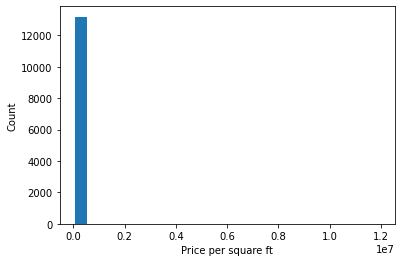

In [18]:
plt.hist(df['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

# We are not able to clearly see all values. Let's try log scale

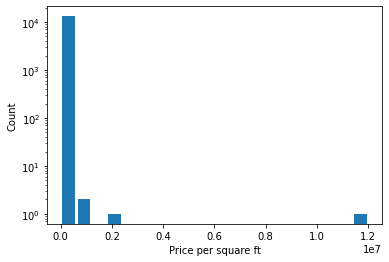

In [19]:
plt.hist(df['price_per_sqft'], bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

# Treating outliers using percentile first

In [20]:
lower_limit, upper_limit = df['price_per_sqft'].quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [21]:
outliers = df[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
12355,other,4 BHK,16335.0,4.0,149.0,4,912
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7575,other,1 BHK,425.0,1.0,750.0,1,176470
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
3934,other,1 BHK,1500.0,1.0,19.5,1,1300


In [22]:
df2 = df[(df['price_per_sqft']<upper_limit) & (df['price_per_sqft']>lower_limit)]
df2.shape

(13172, 7)

In [23]:
df.shape[0] - df2.shape[0]

28

We removed 28 outliers

# Removing outliers using 4 standard deviation 

In [24]:
max_limit = df2['price_per_sqft'].mean() + 4*df2['price_per_sqft'].std()
min_limit = df2['price_per_sqft'].mean() - 4*df2['price_per_sqft'].std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [28]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [29]:
df2.shape[0]-df3.shape[0]

125

We removed 125 outliers

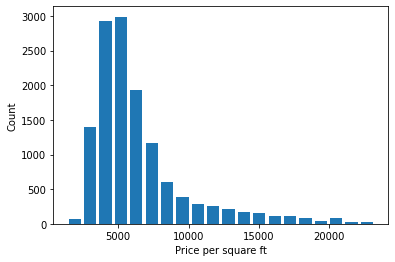

In [30]:
plt.hist(df3['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

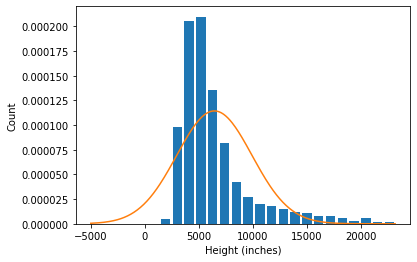

In [37]:
from scipy.stats import norm
import numpy as np

plt.hist(df3['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3['price_per_sqft'].max(), 100)
plt.plot(rng, norm.pdf(rng,df3['price_per_sqft'].mean(),df3['price_per_sqft'].std()))

# Using z-score to remove outliers

In [38]:
df2['zscore'] = (df2['price_per_sqft']-df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()
df2.sample(10)

C:\Users\mailt\AppData\Local\Temp\ipykernel_9720\2644599367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2['price_per_sqft']-df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6943,Hebbal,3 BHK,2850.0,5.0,343.00,3,12035,1.297107
3650,Haralur Road,2 BHK,1300.0,2.0,79.00,2,6076,-0.141910
12195,other,1 BHK,700.0,1.0,25.50,1,3642,-0.729688
10913,Jalahalli,3 BHK,1704.0,3.0,94.36,3,5537,-0.272072
3694,EPIP Zone,3 BHK,1500.0,3.0,102.00,3,6800,0.032926
6703,Hosakerehalli,3 BHK,1596.0,3.0,79.80,3,5000,-0.401750
12774,Electronics City Phase 1,1 BHK,755.0,1.0,30.12,1,3989,-0.645892
12235,Electronic City,2 BHK,970.0,2.0,35.00,2,3608,-0.737899
8350,Kanakpura Road,3 BHK,1843.0,3.0,88.00,3,4774,-0.456326
7442,other,3 BHK,1670.0,3.0,75.00,3,4491,-0.524666


In [39]:
df4 = df2[(df2['zscore']>-4)&(df2['zscore']<4)]
df4.shape

(13047, 8)

In [40]:
df2.shape[0] - df4.shape[0]

125

In this step again we removed 125 outliers